# Install Modules

In [ ]:
%pip install opencv-python
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install pydot 
%pip install graphviz
%pip install tensorflow
%pip install keras

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ------------ --------------------------- 3.9/12.7 MB 26.2 MB/s eta 0:00:01
   ---------------------------- ----------- 8.9/12.7 MB 27.7 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 24.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ------------------------------------

In [14]:
%pip install tqdm
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img  # Use tf.keras.preprocessing.image
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

## Load the Dataset

In [18]:
BASE_DIR = 'input/UTKFace/'

In [17]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)


100%|██████████| 23708/23708 [00:00<00:00, 912213.41it/s]


In [19]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 987885.31it/s]


In [20]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,input/UTKFace/100_0_0_20170112213500903.jpg.ch...,100,0
1,input/UTKFace/100_0_0_20170112215240346.jpg.ch...,100,0
2,input/UTKFace/100_1_0_20170110183726390.jpg.ch...,100,1
3,input/UTKFace/100_1_0_20170112213001988.jpg.ch...,100,1
4,input/UTKFace/100_1_0_20170112213303693.jpg.ch...,100,1


In [21]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

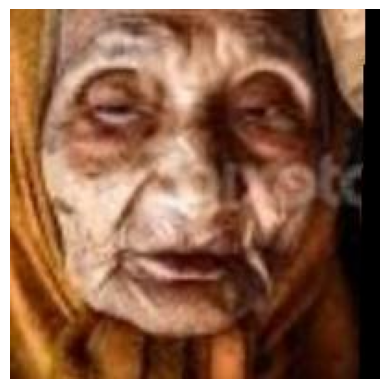

In [22]:
from PIL import Image
img = Image.open(df['image'][10])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

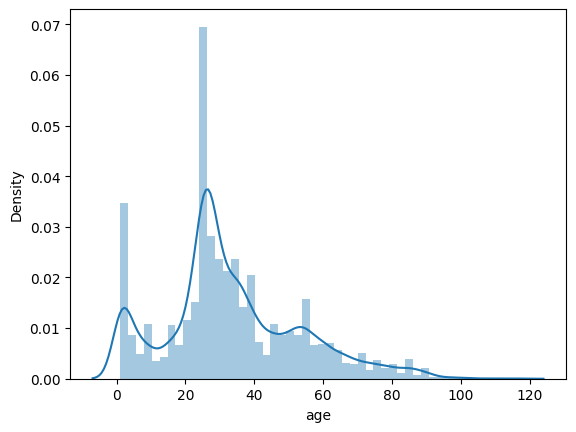

In [23]:
sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of Gender')

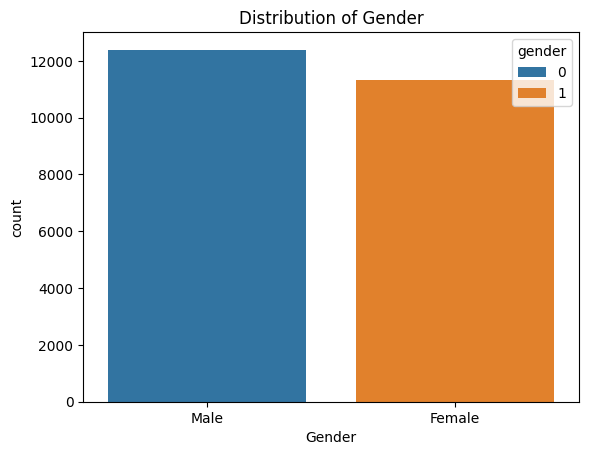

In [24]:
# This line of code is not working it is only showing the total number of images in a form
# of a single column. So i used the updated code below.
# sns.countplot(df['gender'])  


# Read the usage of hue in below code for future reference
# By adding the hue='gender' parameter to sns.countplot, it will separate the bars 
# by gender (0 for Male, 1 for Female) and display them in different colors.

sns.countplot(x='gender', data=df, hue='gender')
plt.xlabel("Gender")
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Distribution of Gender")

Exception ignored in: <function tqdm.__del__ at 0x0000015A89C26020>
Traceback (most recent call last):
  File "c:\Users\admin\Desktop\J. Gang\Test\.venv\Lib\site-packages\tqdm\std.py", line 1148, in __del__
  File "c:\Users\admin\Desktop\J. Gang\Test\.venv\Lib\site-packages\tqdm\notebook.py", line 279, in close
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


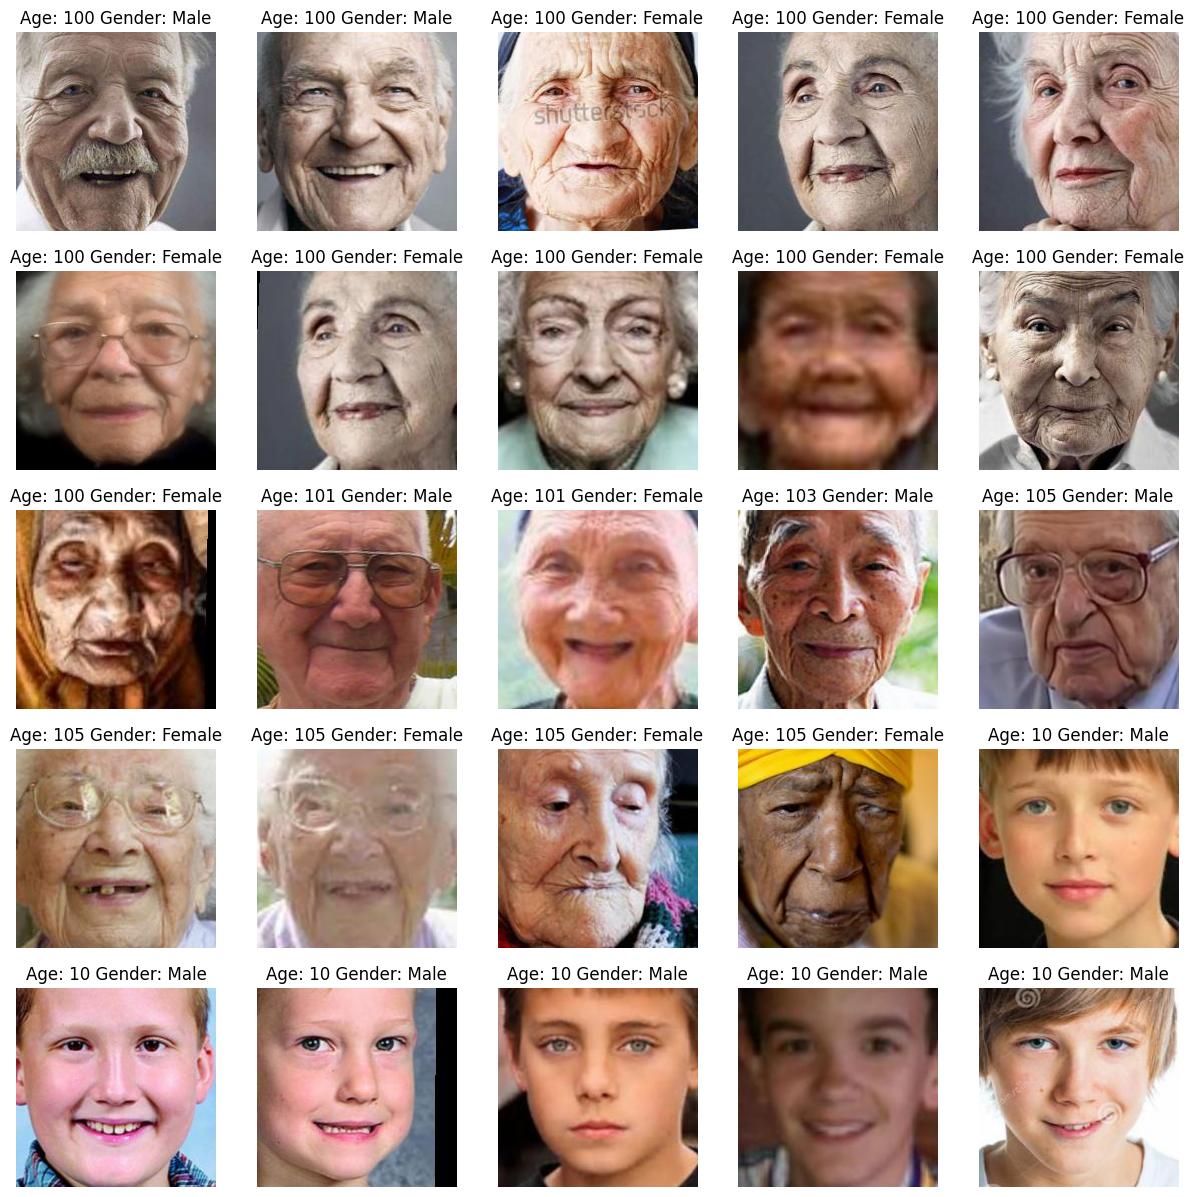

In [27]:
# to display grid of images
plt.figure(figsize=(15, 15))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [28]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [29]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
# normalize the images
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1)

## Model Creation

In [16]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

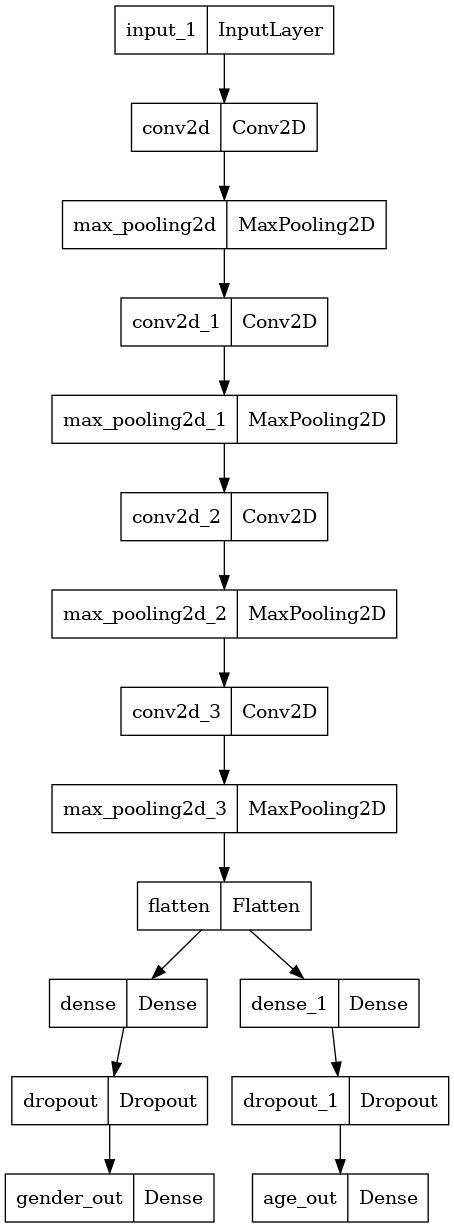

In [18]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 25s 21ms/step - loss: 15.3149 - gender_out_loss: 0.6748 - age_out_loss: 14.6402 - gender_out_accuracy: 0.5999 - age_out_accuracy: 0.0476 - val_loss: 13.0185 - val_gender_out_loss: 0.5370 - val_age_out_loss: 12.4815 - val_gender_out_accuracy: 0.7273 - val_age_out_accuracy: 0.0394
Epoch 2/30
593/593 [==============================] - 11s 19ms/step - loss: 11.1110 - gender_out_loss: 0.4776 - age_out_loss: 10.6334 - gender_out_accuracy: 0.7697 - age_out_accuracy: 0.0284 - val_loss: 9.4736 - val_gender_out_loss: 0.4306 - val_age_out_loss: 9.0430 - val_gender_out_accuracy: 0.8013 - val_age_out_accuracy: 0.0154
Epoch 3/30
593/593 [==============================] - 11s 19ms/step - loss: 9.5563 - gender_out_loss: 0.3977 - age_out_loss: 9.1586 - gender_out_accuracy: 0.8136 - age_out_accuracy: 0.0159 - val_loss: 8.6304 - val_gender_out_loss: 0.3534 - val_age_out_loss: 8.2770 - val_gender_out_accuracy: 0.8397 - val_age_out_accuracy: 0.0105
Epoc

## Plot the Results

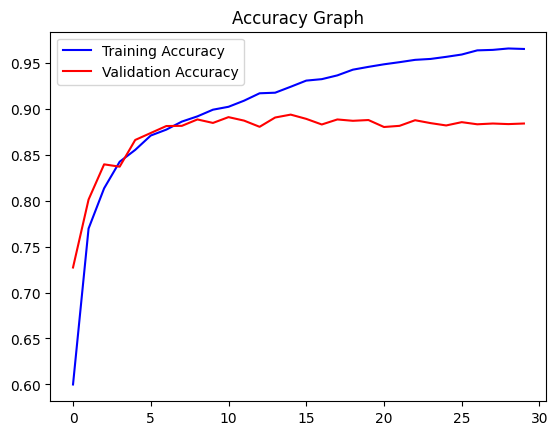

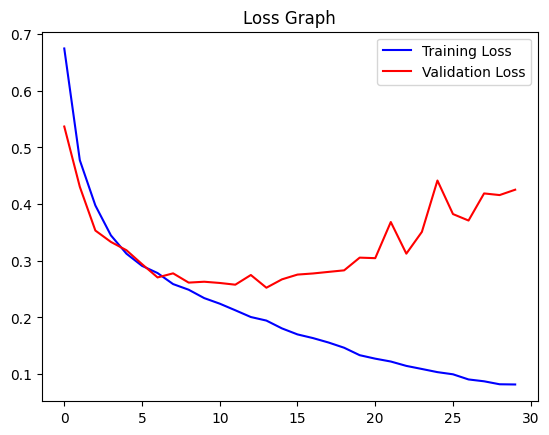

In [20]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

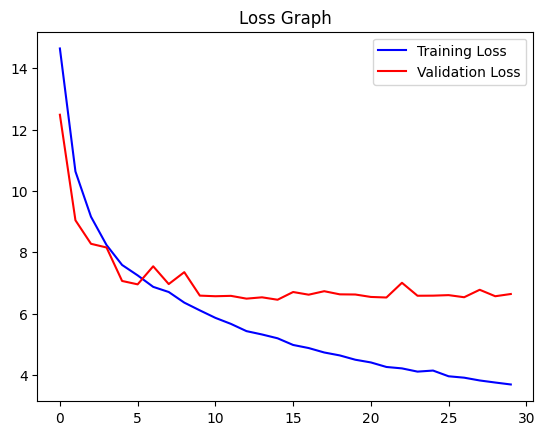

In [21]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 18
1/1 [==============================] - 0s 19ms/step
Predicted Gender: Female Predicted Age: 17


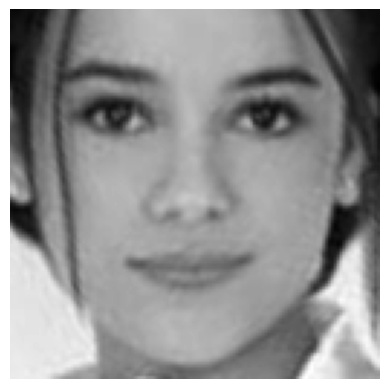

In [26]:
image_index = 10
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Male Predicted Age: 22


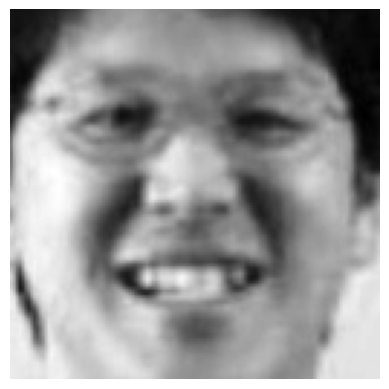

In [27]:
image_index = 300
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 56
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Male Predicted Age: 56


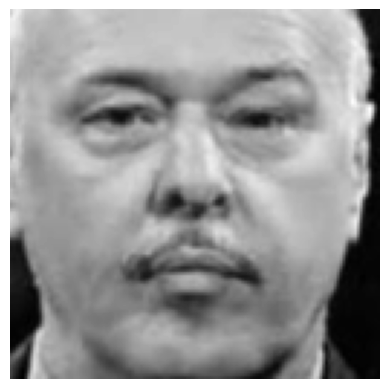

In [30]:
image_index = 2500
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 10
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Female Predicted Age: 10


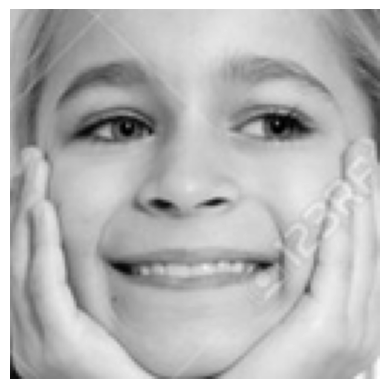

In [31]:
image_index = 2567
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 26
1/1 [==============================] - 0s 27ms/step
Predicted Gender: Female Predicted Age: 26


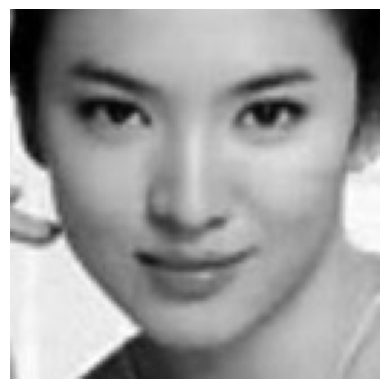

In [34]:
image_index = 1577
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');